In [240]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import statsmodels.api as sm
import researchpy as rp
from statsmodels.formula.api import ols
from pandas.api.types import CategoricalDtype

In [ ]:
##1.  A physician is evaluating a new diet for her patients with a family history of heart disease. To test the effectiveness 
##  of this diet, 16 patients are placed on the diet for 6 months. Their weights and triglyceride levels are measured before 
##  and after the study, and the physician wants to know if either set of measurements has changed.

In [2]:
p=pd.read_csv("C:/Users/kaust/Desktop/Datasets/dataset/dietstudy.csv")
p

,patid,age,gender,tg0,tg1,tg2,tg3,tg4,wgt0,wgt1,wgt2,wgt3,wgt4
0,1,45,Male,180,148,106,113,100,198,196,193,188,192
1,2,56,Male,139,94,119,75,92,237,233,232,228,225
2,3,50,Male,152,185,86,149,118,233,231,229,228,226
3,4,46,Female,112,145,136,149,82,179,181,177,174,172
4,5,64,Male,156,104,157,79,97,219,217,215,213,214
5,6,49,Female,167,138,88,107,171,169,166,165,162,161
6,7,63,Male,138,132,146,143,132,222,219,215,215,210
7,8,63,Female,160,128,150,118,123,167,167,166,162,161
8,9,52,Male,107,120,129,195,174,199,200,196,196,193
9,10,45,Male,156,103,126,135,92,233,229,229,229,226


In [ ]:
## Here we want to know the effectiveness of the diet before and after the 6 month period for each measurment type (triglyceride
## and weights level). Hence, we need to take tg0 & tg4 as initial and final measurements for triglyceride level, and wgt0 & wgt4 
## as initial and final measurements for weight level.  

In [ ]:
## For triglyceride levels

In [18]:
p[["tg0","tg4"]].describe()

,tg0,tg4
count,16.00000,16.000000
mean,138.43750,124.375000
std,29.04013,29.411732
min,94.00000,82.000000
25%,110.75000,99.250000
50%,142.00000,122.000000
75%,157.00000,148.500000
max,186.00000,174.000000


In [19]:
p["tg4"].corr(p["tg0"])

-0.2861910648722715

In [29]:
stats.ttest_rel(p["tg4"],p["tg0"])

Ttest_relResult(statistic=-1.2000008533342437, pvalue=0.24874946576903698)

In [21]:
## For weights level

In [22]:
p[["wgt0","wgt4"]].describe()

,wgt0,wgt4
count,16.000000,16.000000
mean,198.375000,190.312500
std,33.472128,33.507648
min,151.000000,140.000000
25%,168.500000,161.000000
50%,198.500000,192.500000
75%,224.750000,216.750000
max,257.000000,249.000000


In [23]:
p["wgt4"].corr(p["wgt0"])

0.9962873971415401

In [32]:
stats.ttest_rel(p["wgt4"],p["wgt0"])

Ttest_relResult(statistic=-11.174521688532522, pvalue=1.137689414996614e-08)

In [ ]:
### CONCLUSION :--

## For triglycide levels--
# 
# It dropped between 14 and 15 points on average after 6 months of the diet
# 
# At -0.286, the correlation between the initial and final measurements of triglycide levels is not statistically significant. 
# Hence, the change is inconsistent across patients. 
# 
# Since the p-value is more than 0.05 there is no difference between the means. Therfore, the trigylceride levels of the patients  
# were not being significantly reduced by diet.


## For weight levels--
# 
# The patients lost weight on an average of about 8 pounds after 6 months of diet
# 
# At 0.996, the correlation between the initial and final measurements of weight levels is almost perfect. Hence, all the 
# patients lost weight quite consistently.
#
# Since the p-value is less than 0.05 there is a difference between the means. Therefore, the average loss of weight per patient
# is not due to variation and can be attributed to diet.


## Note -- The standard deviations for pre and post diet measurements reveal that patients were more variable with respect to 
##         weight than to triglyceride levels.

In [37]:
##2.  An analyst at a department store wants to evaluate a recent credit card promotion. To this end, 500 cardholders were 
##   randomly selected. Half received an ad promoting a reduced interest rate on purchases made over the next three months, 
##   and half received a standard seasonal ad. Is the promotion effective to increase sales?

In [75]:
p=pd.read_csv("C:/Users/kaust/Desktop/Datasets/dataset/creditpromo.csv")
p

,id,insert,dollars
0,148,Standard,2232.771979
1,572,New Promotion,1403.807542
2,973,Standard,2327.092181
3,1096,Standard,1280.030541
4,1541,New Promotion,1513.563200
5,1947,New Promotion,1729.627996
6,2001,New Promotion,1609.705918
7,2130,Standard,1476.624884
8,2616,Standard,1460.769753
9,2886,New Promotion,1854.489028


In [76]:
x=p.loc[p["insert"]=="Standard"]

In [77]:
y=p.loc[p["insert"]=="New Promotion"]

In [79]:
x["dollars"].describe()

count     250.000000
mean     1566.389031
std       346.673047
min       544.597003
25%      1361.288278
50%      1547.361028
75%      1788.361107
max      2713.027594
Name: dollars, dtype: float64

In [39]:
y["dollars"].describe()

count     250.000000
mean     1637.499983
std       356.703169
min       745.650447
25%      1407.266115
50%      1661.078154
75%      1884.878536
max      2637.884197
Name: dollars, dtype: float64

In [43]:
stats.levene(x["dollars"],y["dollars"])

LeveneResult(statistic=1.1334682485473733, pvalue=0.28755268634638775)

In [44]:
stats.ttest_ind(x["dollars"],y["dollars"])

Ttest_indResult(statistic=-2.2604227264649963, pvalue=0.024225996894147814)

In [61]:
### CONCLUSION :--

# On an Average, customers who received the interest-rate promotion charged about $70 more than the customers who had recieved a
# a Standard seasonal ad, and they vary a little more around their average. 

# First, we used Levene test to check whether the variances of the 2 groups are equal. Here, the p-value is greater than .05, 
# hence we can assume that groups have equal variances.

# Now, using 2 Independent sample means test, we find that the p value is less than 0.05, hence there is a significant difference
# in the spending pattern of people in different groups (seasonal ad and promotional reduced interest rate) after initiating the 
# new promotional ad. Therefore, the credit card promotion by store is effective to increase sales.

In [62]:
##3.  An experiment is conducted to study the hybrid seed production of bottle gourd under open field conditions. The main aim
##   of the investigation is to compare natural pollination and hand pollination. The data are collected on 10 randomly 
##   selected plants from each of natural pollination and hand pollination. The data are collected on fruit weight (kg), 
##   seed yield/plant (g) and seedling length (cm).
##   a. Is the overall population of Seed yield/plant (g) equals to 200?
##   b. Test whether the natural pollination and hand pollination under open field conditions are equally effective or are 
##      significantly different.

In [46]:
p=pd.read_csv("C:/Users/kaust/Desktop/Datasets/dataset/pollination.csv")
p

,Group,Fruit_Wt,Seed_Yield_Plant,Seedling_length
0,Natural,1.85,147.70,16.86
1,Natural,1.86,136.86,16.77
2,Natural,1.83,149.97,16.35
3,Natural,1.89,172.33,18.26
4,Natural,1.80,144.46,17.90
5,Natural,1.88,138.30,16.95
6,Natural,1.89,150.58,18.15
7,Natural,1.79,140.99,18.86
8,Natural,1.85,140.57,18.39
9,Natural,1.84,138.33,18.58


In [ ]:
# a.

In [58]:
p.describe()

,Fruit_Wt,Seed_Yield_Plant,Seedling_length
count,20.000000,20.000000,20.000000
mean,2.207000,180.803500,18.148500
std,0.378794,37.311011,0.881269
min,1.790000,136.860000,16.350000
25%,1.850000,143.592500,17.787500
50%,2.115000,184.915000,18.220000
75%,2.580000,214.855000,18.887500
max,2.740000,233.840000,19.360000


In [60]:
x=p["Seed_Yield_Plant"].mean()
x

180.8035

In [71]:
stats.ttest_1samp(p["Seed_Yield_Plant"],200)

Ttest_1sampResult(statistic=-2.3009121248548645, pvalue=0.032891040921283025)

In [72]:
stats.ttest_1samp(x,200)

C:\Users\kaust\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3194: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
C:\Users\kaust\Anaconda3\lib\site-packages\numpy\core\_methods.py:127: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\kaust\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\kaust\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\kaust\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


Ttest_1sampResult(statistic=nan, pvalue=nan)

In [ ]:
#b.

In [50]:
x1=p.loc[p["Group"]=="Natural"]

In [57]:
x2=p.loc[p["Group"]=="Hand"]

In [93]:
x1[["Seed_Yield_Plant","Fruit_Wt","Seedling_length"]].describe()

,Seed_Yield_Plant,Fruit_Wt,Seedling_length
count,10.000000,10.000000,10.000000
mean,146.009000,1.848000,17.707000
std,10.496087,0.034577,0.888645
min,136.860000,1.790000,16.350000
25%,138.890000,1.832500,16.882500
50%,142.725000,1.850000,18.025000
75%,149.402500,1.875000,18.357500
max,172.330000,1.890000,18.860000


In [94]:
x2[["Seed_Yield_Plant","Fruit_Wt","Seedling_length"]].describe()

,Seed_Yield_Plant,Fruit_Wt,Seedling_length
count,10.000000,10.000000,10.000000
mean,215.598000,2.566000,18.590000
std,11.763712,0.123756,0.645532
min,197.500000,2.340000,17.450000
25%,210.760000,2.477500,18.097500
50%,215.410000,2.580000,18.730000
75%,222.457500,2.657500,19.052500
max,233.840000,2.740000,19.360000


In [96]:
stats.ttest_ind(x1["Fruit_Wt"],x2["Fruit_Wt"])

Ttest_indResult(statistic=-17.669989614440286, pvalue=8.078362076486221e-13)

In [87]:
stats.ttest_ind(x1["Seed_Yield_Plant"],x2["Seed_Yield_Plant"])

Ttest_indResult(statistic=-13.958260515902547, pvalue=4.2714815854843853e-11)

In [89]:
stats.ttest_ind(x1["Seedling_length"],x2["Seedling_length"])

Ttest_indResult(statistic=-2.542229999657055, pvalue=0.020428817064110226)

In [77]:
### CONCLUSION :--

## a. Here the mean value of the overall population for the seed yield/ plant is less than 200. Also, the p-value is less than
##    0.05 which signifies the significant difference between the means. Hence the overall population for the Seed_Yield/Plant
##    is not equal to 200


## b. Here when we study study the hybrid seed production of bottle gourd under open field conditions, then we are taking 
##    Seed_Yield_Plant, Fruit_Wt, Seedling_length factors into consideration. 

##    On an average the Hand pollination fared better than Natural pollination taking every case into consideration. Also, they 
##    vary a little about their average.

##   In all the cases the p-values are less than 0.05 which implies that the natural pollination and hand pollination under open 
##   field conditions are significantly different.

In [78]:
##4. An electronics firm is developing a new DVD player in response to customer requests. Using a prototype, the marketing team 
##  has collected focus data for different age groups viz. Under 25; 25-34; 35-44; 45-54; 55-64; 65 and above. Do you think that
##  consumers of various ages rated the design differently?

In [184]:
p=pd.read_csv("C:/Users/kaust/Desktop/Datasets/dataset/dvdplayer.csv")
p

,agegroup,dvdscore
0,65 and over,38.454803
1,55-64,17.669677
2,65 and over,31.704307
3,65 and over,25.924460
4,Under 25,30.450007
5,Under 25,35.609909
6,65 and over,29.677695
7,25-34,38.167369
8,65 and over,23.509700
9,45-54,26.051029


In [185]:
p.groupby(["agegroup"]).describe()

dvdscore                                                        \
               count       mean       std        min        25%        50%   
agegroup                                                                     
25-34           10.0  31.678010  5.837532  22.764507  26.965857  31.405648   
35-44           12.0  37.018058  7.986388  21.823488  32.105175  40.675070   
45-54           10.0  39.118369  6.432401  26.051029  35.490964  40.902718   
55-64            6.0  28.447336  5.433045  17.669677  29.182396  30.058510   
65 and over     17.0  28.002791  5.264783  15.734473  24.910108  27.563325   
Under 25        13.0  28.749228  5.194353  21.642742  25.221803  27.415039   

                                   
                   75%        max  
agegroup                           
25-34        37.176026  38.682637  
35-44        42.449274  45.953191  
45-54        42.176943  47.501470  
55-64        31.063685  32.608214  
65 and over  31.704307  38.454803  
Under 25     30.682770  40.469488

In [198]:
stats.f_oneway(p["dvdscore"][p["agegroup"]=="Under 25"],p["dvdscore"][p["agegroup"]=="25-34"],p["dvdscore"][p["agegroup"]=="35-44"]
              ,p["dvdscore"][p["agegroup"]=="45-54"],p["dvdscore"][p["agegroup"]=="55-64"],p["dvdscore"][p["agegroup"]=="65 and over"])

F_onewayResult(statistic=6.992526962676518, pvalue=3.087324905679639e-05)

In [199]:
mod = ols('dvdscore ~ C(agegroup)', data=p).fit()

In [200]:
sm.stats.anova_lm(mod, typ=2)

,sum_sq,df,F,PR(>F)
C(agegroup),1294.481326,5.0,6.992527,0.000031
Residual,2295.531862,62.0,NaN,NaN


In [195]:
t = p.groupby('agegroup')['dvdscore'].agg('mean')

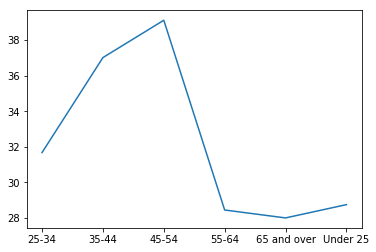

In [197]:
plt.plot(t)

In [ ]:
## CONCLUSION :--
# 
# If we look at the F-Test and the Anova table we find out that the p-value is less than 0.001. Hence there is a signicant 
# difference between the age groups and the consumers of various ages have rated the design differently

# Observing the graphical plot we find out consumers between the age groups of 35 and 54 have rated the DVD player more highly    
# than their counterparts. Also, consumers within these age groups have higher mean than the others when rating the DVD player.

In [ ]:
##5.  A survey was conducted among 2800 customers on several demographic characteristics. Working status, sex, age, age-group, 
##    race, happiness, no. of child, marital status, educational qualifications, income group etc. had been captured for 
##    that purpose.
##    a. Is there any relationship in between labour force status with marital status?
##    b. Do you think educational qualification is somehow controlling the marital status?
##    c. Is happiness is driven by earnings or marital status?

In [201]:
p=pd.read_csv("C:/Users/kaust/Desktop/Datasets/dataset/sample_survey.csv")
p

,id,wrkstat,marital,childs,age,educ,paeduc,maeduc,speduc,degree,...,agecat,childcat,news1,news2,news3,news4,news5,car1,car2,car3
0,1,Working full time,Divorced,2.0,60.0,12.0,12.0,12.0,NaN,High school,...,55 to 64,1-2,No,No,No,No,No,American,Japanese,Japanese
1,2,Working part-time,Never married,0.0,27.0,17.0,20.0,NaN,NaN,Junior college,...,25 to 34,None,No,No,Yes,No,No,American,German,Japanese
2,3,Working full time,Married,2.0,36.0,12.0,12.0,12.0,16.0,High school,...,35 to 44,1-2,No,No,No,Yes,Yes,American,American,NaN
3,4,Working full time,Never married,0.0,21.0,13.0,NaN,12.0,NaN,High school,...,Less than 25,None,No,No,No,Yes,Yes,American,Other,NaN
4,5,Working full time,Never married,0.0,35.0,16.0,NaN,12.0,NaN,Bachelor,...,35 to 44,None,No,No,No,No,No,American,American,Korean
5,6,Working full time,Divorced,1.0,33.0,16.0,9.0,6.0,NaN,Bachelor,...,25 to 34,1-2,No,Yes,No,Yes,Yes,American,Korean,Japanese
6,7,Working full time,Separated,0.0,43.0,12.0,14.0,12.0,NaN,High school,...,35 to 44,None,No,No,No,Yes,Yes,Korean,American,American
7,8,Working full time,Never married,0.0,29.0,13.0,16.0,12.0,NaN,High school,...,25 to 34,None,No,No,No,Yes,Yes,Other,Japanese,NaN
8,9,Working part-time,Married,2.0,39.0,18.0,16.0,12.0,13.0,Bachelor,...,35 to 44,1-2,Yes,No,Yes,No,No,American,Korean,NaN
9,10,Working full time,Divorced,0.0,45.0,15.0,16.0,12.0,NaN,Junior college,...,45 to 54,None,No,Yes,No,Yes,Yes,Korean,Japanese,Korean


In [242]:
p.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2832 entries, 0 to 2831
Data columns (total 46 columns):
id          2832 non-null int64
wrkstat     2831 non-null object
marital     2831 non-null object
childs      2825 non-null float64
age         2828 non-null float64
educ        2820 non-null float64
paeduc      2041 non-null float64
maeduc      2399 non-null float64
speduc      1311 non-null float64
degree      2822 non-null object
sex         2832 non-null object
race        2832 non-null object
born        2819 non-null object
parborn     2812 non-null object
granborn    2630 non-null float64
income      2503 non-null object
rincome     1849 non-null object
polviews    2691 non-null object
cappun      2599 non-null object
postlife    2066 non-null object
happy       2806 non-null object
hapmar      1337 non-null object
owngun      1869 non-null object
news        1870 non-null object
tvhours     2337 non-null float64
howpaid     1347 non-null object
ethnic      2238 non-null ob

In [ ]:
#a.

In [285]:
cht,test_result=rp.crosstab(p["wrkstat"],p["marital"],test="chi-square")

In [286]:
cht

marital                                              
                        Divorced Married Never married Separated Widowed   All
wrkstat                                                                       
Keeping house                 25     200            35        13      55   328
Other                         12      16            14         4       8    54
Retired                       53     168            17         6     150   394
School                         7       9            60         2       1    79
Temporarily not working        9      23            11         1       2    46
Unemployed, laid off          10      13            32         0       3    58
Working full time            295     778           392        58      44  1567
Working part-time             35     138           102         9      20   304
All                          446    1345           663        93     283  2830

In [287]:
test_result

,Chi-square test,results
0,Pearson Chi-square ( 28.0) =,729.2421
1,p-value =,0.0000
2,Cramer's V =,0.2538


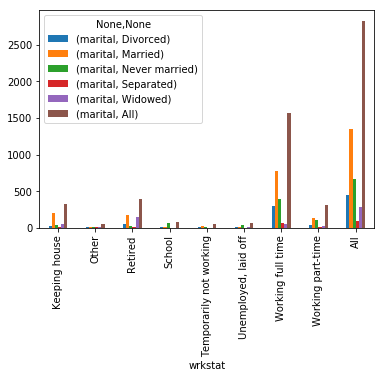

In [288]:
cht.plot(kind="bar")

In [ ]:
#b.

In [289]:
cht,test_result=rp.crosstab(p["degree"],p["marital"],test="chi-square")

In [290]:
cht

marital                                              
               Divorced Married Never married Separated Widowed   All
degree                                                               
Bachelor             58     251           129        12      28   478
Graduate             29     123            41         3       9   205
High school         241     686           367        58     148  1500
Junior college       45     108            46         3       6   208
LT High school       70     174            77        17      92   430
All                 443    1342           660        93     283  2821

In [291]:
test_result

,Chi-square test,results
0,Pearson Chi-square ( 16.0) =,122.6845
1,p-value =,0.0000
2,Cramer's V =,0.1043


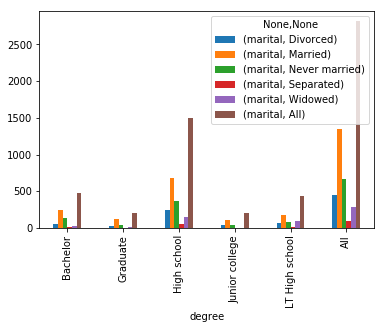

In [292]:
cht.plot(kind="bar")

In [246]:
#c.

In [281]:
cht,test_result=rp.crosstab(p["marital"],p["happy"],test="chi-square")

In [282]:
cht

happy                              
              Not too happy Pretty happy Very happy   All
marital                                                  
Divorced                 72          278         93   443
Married                  71          684        582  1337
Never married           108          426        120   654
Separated                30           49         13    92
Widowed                  59          137         83   279
All                     340         1574        891  2805

In [283]:
test_result

,Chi-square test,results
0,Pearson Chi-square ( 8.0) =,260.6894
1,p-value =,0.0000
2,Cramer's V =,0.2156


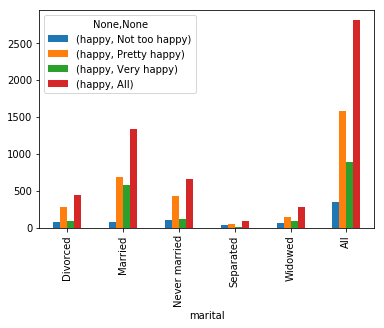

In [284]:
cht.plot(kind="bar")

In [275]:
cht,test_result=rp.crosstab(p["income"],p["happy"],test="chi-square")

In [276]:
cht

happy                              
               Not too happy Pretty happy Very happy   All
income                                                    
$1000 TO 2999              7           20          5    32
$10000 - 14999            39          107         44   190
$15000 - 19999            33          119         26   178
$20000 - 24999            40          155         50   245
$25000 or more           113          888        571  1572
$3000 TO 3999              9           11          4    24
$4000 TO 4999              9           13         10    32
$5000 TO 5999              6           18         11    35
$6000 TO 6999             14           13          6    33
$7000 TO 7999             12           21         14    47
$8000 TO 9999              9           30         19    58
LT $1000                  11           13         11    35
All                      302         1408        771  2481

In [277]:
test_result

,Chi-square test,results
0,Pearson Chi-square ( 22.0) =,178.9505
1,p-value =,0.0000
2,Cramer's V =,0.1899


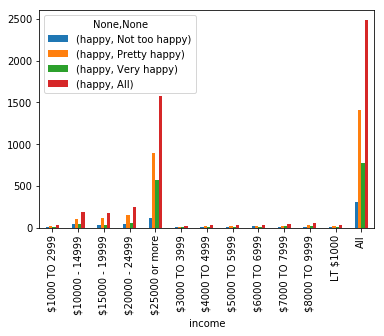

In [278]:
cht.plot(kind="bar")

In [ ]:
##Conclusion:--

# We have used Chi-Square test for determining the relation between the categorical variables. Also, Cramer's V test is used to
# find out how strong is the association between 2 variables

# a. Here the p-value is less than 0.0001 statistically signifying that there is some relation between labour force status and 
#    marital status. Also, the relation between them is very strong as V > 0.25
#    From the barplot, it is found that mostly people working full-time are married. 

# b. Here the p-value is less than 0.0001 statistically signifying that educational qualification is somehow controlling marital
#    status. Also, there is a moderate association between them as V > 0.10
#    From the barplot, it is found that mostly married people are from High school.

# c. In both the cases the p-value is less than 0.0001 statistically signifying that happiness is driven by earnings or marital 
#    status. Also, there is a strong association between them as V > 0.15
#    From the barplot, it is found that mostly married people are pretty happy and people with the earning of $25000 are pretty 
#    happy